# EDA of haberman cancer data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
cancer=pd.read_csv(r'C:\Users\Kumari Sapna\downloads\haberman.csv')

In [4]:
cancer.shape

(305, 4)

In [6]:
cancer.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
cancer["status"].value_counts()

1    225
2     80
Name: status, dtype: int64

In [9]:
cancer.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
cancer.head(20)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


<AxesSubplot:xlabel='age', ylabel='year'>

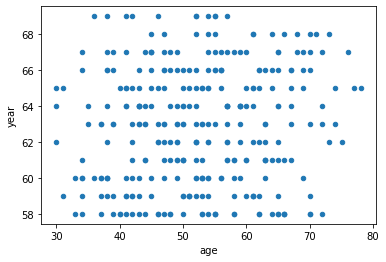

In [10]:
cancer.plot(kind='scatter',x="age", y="year")

C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


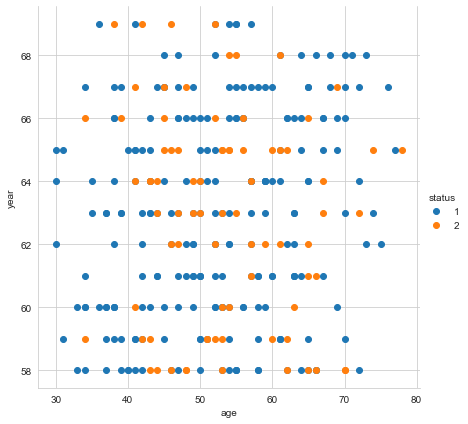

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer, hue="status", size=6)\
   .map(plt.scatter, "age", "year")\
   .add_legend();
plt.show()

C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


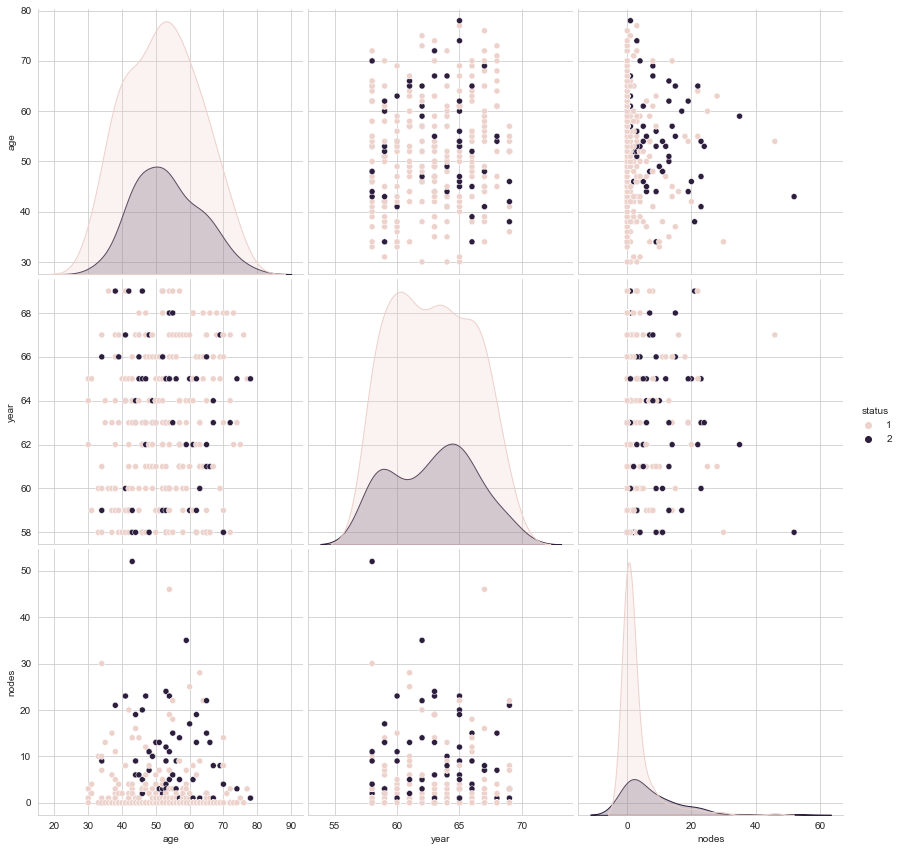

In [14]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer, hue="status", size=4);
plt.show()

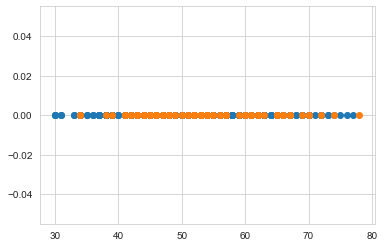

In [16]:
# histogram 

cancer_survival=cancer.loc[cancer["status"]==1];
cancer_dead=cancer.loc[cancer["status"]==2];
plt.plot(cancer_survival["age"], np.zeros_like(cancer_survival["age"]),'o')
plt.plot(cancer_dead["age"], np.zeros_like(cancer_dead["age"]), 'o')
plt.show()

C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


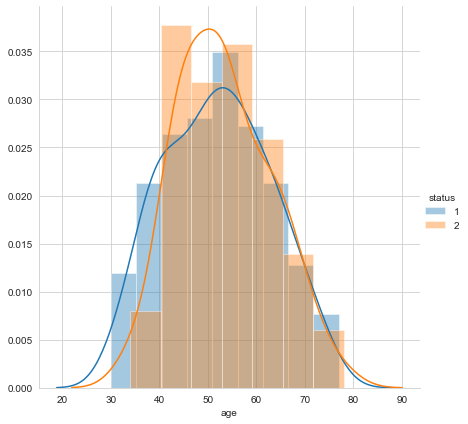

In [17]:
sns.FacetGrid(cancer, hue="status", size=6)\
   .map(sns.distplot, "age")\
   .add_legend();
plt.show()

C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


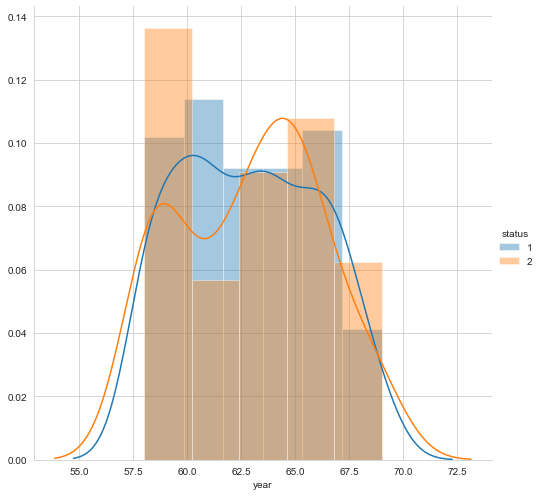

In [18]:
 sns.FacetGrid(cancer, hue="status", size=7)\
    .map(sns.distplot, "year")\
    .add_legend();
plt.show()

C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kumari Sapna\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


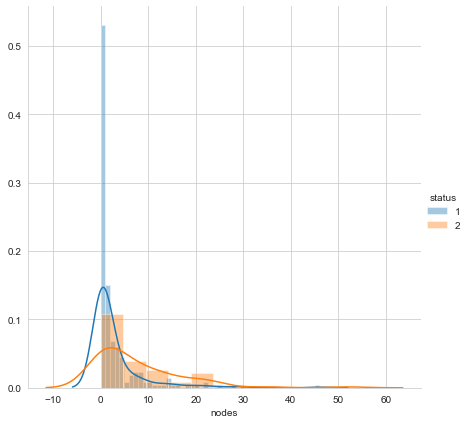

In [19]:
sns.FacetGrid(cancer, hue="status", size=6)\
   .map(sns.distplot, "nodes")\
   .add_legend();
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


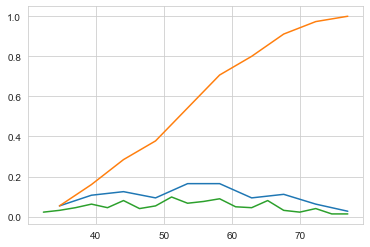

In [22]:
#cdf and pdf

counts, bin_edges=np.histogram(cancer_survival['age'], bins=10, 
                               density = True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

counts, bin_edges=np.histogram(cancer_survival["age"], bins=20, 
                               density = True)
pdf=counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


<function matplotlib.pyplot.show(close=None, block=None)>

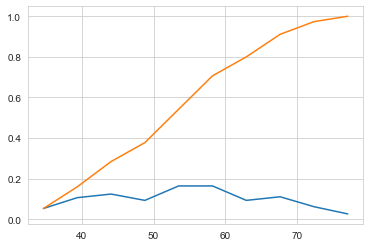

In [23]:
counts, bin_edges = np.histogram(cancer_survival["age"], bins=10, 
                                 density = True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.0375 0.075  0.2125 0.1125 0.2    0.1    0.0875 0.1125 0.0375 0.025 ]
[34.  38.4 42.8 47.2 51.6 56.  60.4 64.8 69.2 73.6 78. ]


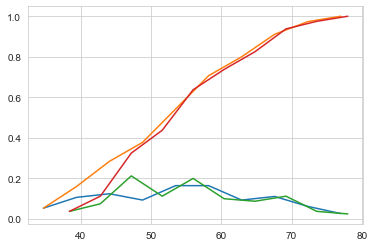

In [25]:
# for survival

counts, bin_edges= np.histogram(cancer_survival["age"], bins=10, 
                                density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

#for dead
counts, bin_edges = np.histogram(cancer_dead["age"], bins=10, 
                                 density = True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show()

In [28]:
#mean

print(np.mean(cancer_survival["age"]))
print(np.mean(np.append(cancer_survival["age"],150)))  # with outliar
print(np.mean(cancer_dead["age"]))

52.01777777777778
52.45132743362832
53.3125


In [29]:
# std-dev.

print(np.std(cancer_survival["age"]))
print(np.std(cancer_dead["age"]))

10.98765547510051
9.617164018046068


In [31]:
#median

print(np.median(cancer_survival["age"]))
print(np.median(np.append(cancer_survival["age"],150)))  # with outliar
print(np.median(cancer_dead["age"]))

52.0
52.0
53.0


In [34]:
# quantiles

print(np.percentile(cancer_survival["age"], np.arange(0,100,25)))
print(np.percentile(cancer_dead["age"], np.arange(0,100,25)))

[30. 43. 52. 60.]
[34. 46. 53. 61.]


In [35]:
# 90 percentiles

print(np.percentile(cancer_survival["age"], 90))
print(np.percentile(cancer_dead["age"], 90))

67.0
66.10000000000001


In [37]:
# MAD

from statsmodels import robust
print(robust.mad(cancer_survival["age"]))
print(robust.mad(cancer_dead["age"]))

13.343419966550417
11.119516638792014


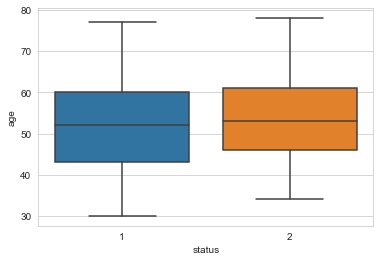

In [41]:
# box plot

sns.boxplot(x="status", y="age", data=cancer)
plt.show()

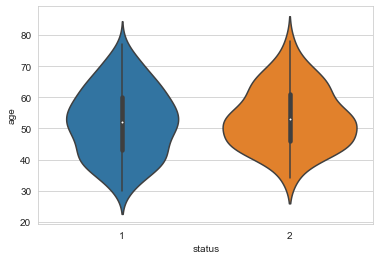

In [42]:
# violin plot

sns.violinplot(x="status", y="age", data=cancer, size=6)
plt.show()

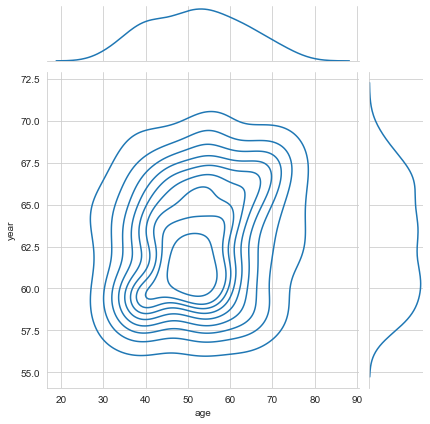

In [43]:
#contour plot
# for survival

sns.jointplot(x="age", y="year", data=cancer_survival, kind="kde")
plt.show()

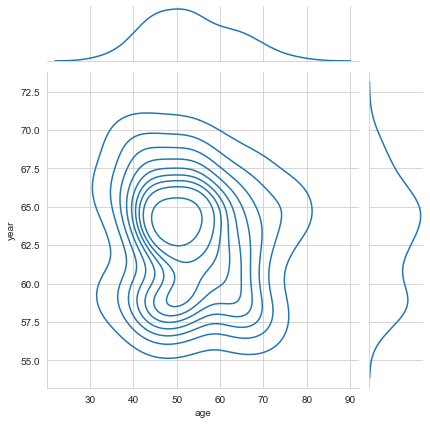

In [44]:
# caontour plot for dead

sns.jointplot(x="age", y="year", data=cancer_dead, kind="kde")
plt.show()